### Reference.

1. [심리검사 개발부터 활용까지] 윤명희, 서희정, 김경희, 구경희
2. https://www.datacamp.com/tutorial/introduction-factor-analysis


# 요인 분석(factor analysis)

<br>

* <구인타당도>를 검정하기 위해 일반적으로 사용되는 통계적 방법

* 아직 정의되지 않은 많은 변수(문항) 사이의 상관계수를 추출하고, 상관이 높은 변수들을 모아 요인으로 묶어 그 의미를 부여하는 과정

* 구인타당도(construct validity)
    - 검사 도구가 측정하고자 하는 어떤 특성이 있을 때, 해당 특성을 구성하는 하위 개념(구인)을 얼마나 제대로 측정하고 있는지 확인

<br><br>

__<절차>__

1. 상관행렬 생성
2. 요인 추출
    - [종류]
        - PCA 주성분 분석 : 데이터 차원 축소로 단순화하되 소실되는 정보량을 최소화하기 위해, 데이터의 최대 분산을 설명할 수 있는 주성분을 추출합니다.
        - CFA 공통 요인 분석 : 공통 요인을 추출해 변수들 간 공통된 분산을 설명
3. 요인 회전
    - 각 변수가 하나의 요인에 대해 적재량이 높도록, 다른 요인에 대해서는 낮도록 처리. -> 단순 구조를 만들어 해석 용이성의 증대
    - [종류]
        - 직각 회전(orthogonal rotation)
            - 요인들 간 상관관계를 0에 가깝게 함(요인들 간 상호 독립적)
            - varimax, quartimax, equamax
        - 사각 회전(oblique rotation)
            - 요인들 간 상관관계를 허용
            - promax, direct oblimin
4. 요인 적재값 해석

<br><br>

__<종류>__

1. 탐색적 요인분석(exploratory factor analysis)
 * 개별 문항이 어떠한 요인으로 구성되는지 사전 정보가 없을 때, 개별 문항들 중 상관이 높은 것을 모아 요인으로 규정
 * 신규 검사 개발 시


2. 확인적 요인분석(confirmatory factor analysis)
 * 검사의 하위 요인과 요인 수 정보를 이미 알고 있을 때, 각 요인에 포함된 문항들이 사전 정보와 일치하게 묶이는지 재확인
 * 이미 개발된 설문의 요인 구조 검증 또는 이론적 요인 구조 검증 시

# Base Settings

In [1]:
class CONFIG :
    seed = 42
    
    base_path = 'D:/MokProJ/Git_Portfolio/Psychological_Assessment'
    data_path = './data'

In [2]:
import os, gc, joblib, random, warnings
from tqdm.autonotebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

C:\Users\mokj0\AppData\Local\Temp\ipykernel_42364\6470580.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
os.chdir(CONFIG.base_path)
warnings.filterwarnings("ignore")
tqdm.pandas()
sns.set_style("whitegrid")
random.seed(CONFIG.seed)

# Load Data

## BFI Data : 25 Personality items representing 5 factors
<br>

### description

    25 personality self report items taken from the International Personality Item Pool (ipip.ori.org) were included as part of the Synthetic Aperture Personality Assessment (SAPA) web based personality assessment project. The data from 2800 subjects are included here as a demonstration set for scale construction, factor analysis, and Item Response Theory analysis. Three additional demographic variables (sex, education, and age) are also included. This data set is deprecated and users are encouraged to use bfi.

### columns


| Trait | Description | Code |
|-------|-------------|------|
| **A1** | Am indifferent to the feelings of others. | q_146 |
| **A2** | Inquire about others' well-being. | q_1162 |
| **A3** | Know how to comfort others. | q_1206 |
| **A4** | Love children. | q_1364 |
| **A5** | Make people feel at ease. | q_1419 |
| **C1** | Am exacting in my work. | q_124 |
| **C2** | Continue until everything is perfect. | q_530 |
| **C3** | Do things according to a plan. | q_619 |
| **C4** | Do things in a half-way manner. | q_626 |
| **C5** | Waste my time. | q_1949 |
| **E1** | Don't talk a lot. | q_712 |
| **E2** | Find it difficult to approach others. | q_901 |
| **E3** | Know how to captivate people. | q_1205 |
| **E4** | Make friends easily. | q_1410 |
| **E5** | Take charge. | q_1768 |
| **N1** | Get angry easily. | q_952 |
| **N2** | Get irritated easily. | q_974 |
| **N3** | Have frequent mood swings. | q_1099 |
| **N4** | Often feel blue. | q_1479 |
| **N5** | Panic easily. | q_1505 |
| **O1** | Am full of ideas. | q_128 |
| **O2** | Avoid difficult reading material. | q_316 |
| **O3** | Carry the conversation to a higher level. | q_492 |
| **O4** | Spend time reflecting on things. | q_1738 |
| **O5** | Will not probe deeply into a subject. | q_1964 |

   __Gender__

| Code | Description |
|------|-------------|
| 1 | Males |
| 2 | Females |

   __Education__

| Code | Description |
|------|-------------|
| 1 | HS |
| 2 | Finished HS |
| 3 | Some college |
| 4 | College graduate |
| 5 | Graduate degree |

   __Age__

   Age in years

<br>

### Details

    This data set is deprecated and users are encouraged to use bfi.It is kept here backward compatability for one more release.

    The first 25 items are organized by five putative factors: Agreeableness, Conscientiousness, Extraversion, Neuroticism, and Opennness. The scoring key is created using make.keys, the scores are found using score.items.

    These five factors are a useful example of using irt.fa to do Item Response Theory based latent factor analysis of the polychoric correlation matrix. The endorsement plots for each item, as well as the item information functions reveal that the items differ in their quality.

    The item data were collected using a 6 point response scale: 1 Very Inaccurate 2 Moderately Inaccurate 3 Slightly Inaccurate 4 Slightly Accurate 5 Moderately Accurate 6 Very Accurate

    as part of the Synthetic Apeture Personality Assessment (SAPA https://www.sapa-project.org/) project. To see an example of the data collection technique, visit https://www.sapa-project.org/ or the International Cognitive Ability Resource at https://icar-project.org/. The items given were sampled from the International Personality Item Pool of Lewis Goldberg using the sampling technique of SAPA. This is a sample data set taken from the much larger SAPA data bank.

<br>

### Source

    The items are from the ipip (Goldberg, 1999). The data are from the SAPA project (Revelle, Wilt and Rosenthal, 2010) , collected Spring, 2010 
    https://www.sapa-project.org/
* https://vincentarelbundock.github.io/Rdatasets/doc/psych/bfi.html

In [4]:
data = pd.read_csv(CONFIG.data_path+'/bfi.csv')
data

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


# EDA

In [5]:
data.describe()

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
count,2800.000000,2784.000000,2773.00000,2774.000000,2781.000000,2784.000000,2779.000000,2776.000000,2780.000000,2774.000000,...,2764.000000,2771.000000,2778.000000,2800.000000,2772.000000,2786.000000,2780.000000,2800.000000,2577.000000,2800.000000
mean,64599.238214,2.413434,4.80238,4.603821,4.699748,4.560345,4.502339,4.369957,4.303957,2.553353,...,3.185601,2.969686,4.816055,2.713214,4.438312,4.892319,2.489568,1.671786,3.190144,28.782143
std,1728.527002,1.407737,1.17202,1.301834,1.479633,1.258512,1.241347,1.318347,1.288552,1.375118,...,1.569685,1.618647,1.129530,1.565152,1.220901,1.221250,1.327959,0.469647,1.107714,11.127555
min,61617.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,63080.000000,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,...,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,20.000000
50%,64575.000000,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,...,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000,2.000000,3.000000,26.000000
75%,66092.250000,3.000000,6.00000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,...,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000,2.000000,4.000000,35.000000
max,67560.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,5.000000,86.000000


Gender Counts


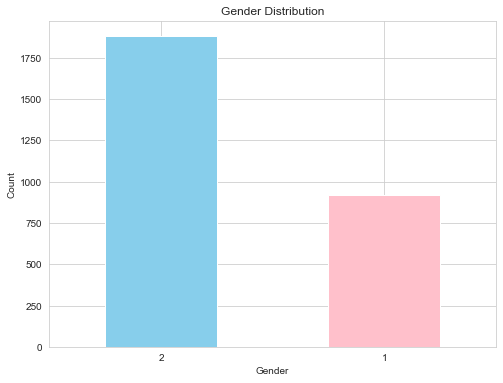

In [6]:
print('Gender Counts')
gender_counts = data['gender'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Education Counts


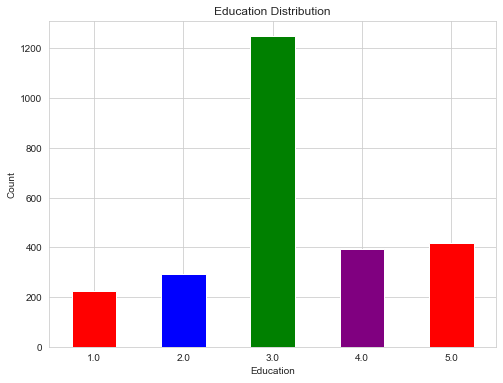

In [7]:
print('Education Counts')
education_counts = data['education'].value_counts()

# Plotting the bar graph with ordered x-axis and different colors
plt.figure(figsize=(8, 6))
education_counts.sort_index(ascending=True).plot(kind='bar', color=['red', 'blue', 'green', 'purple'])
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [8]:
print("Missing values counts")
for col in data.columns :
    print(f"{col}", sum(data[col].isnull()))

Missing values counts
rownames 0
A1 16
A2 27
A3 26
A4 19
A5 16
C1 21
C2 24
C3 20
C4 26
C5 16
E1 23
E2 16
E3 25
E4 9
E5 21
N1 22
N2 21
N3 11
N4 36
N5 29
O1 22
O2 0
O3 28
O4 14
O5 20
gender 0
education 223
age 0


# Preprocessing

In [9]:
# Drop unnecessary columns
data.drop(['rownames', 'gender', 'education', 'age'],axis=1,inplace=True)

In [10]:
# Drop rows of missing values
data.dropna(inplace=True)
print(f"Number of samples to analyse : {len(data)}")
data.describe()

Number of samples to analyse : 2436


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,...,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,2.406404,4.797209,4.598522,4.687603,4.543514,4.525041,4.372332,4.300082,2.549672,3.305829,...,2.943760,3.517652,3.224548,3.202381,2.971264,4.812808,2.684729,4.449918,4.925287,2.468801
std,1.407177,1.179535,1.311355,1.485213,1.270804,1.235258,1.319152,1.291202,1.376689,1.632720,...,1.575909,1.533238,1.594674,1.569633,1.623491,1.126613,1.552883,1.205206,1.193136,1.324021
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000
50%,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000
75%,3.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,5.000000,5.000000,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [11]:
data

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2794,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,...,4.0,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


# 요인 분석에 대한 적합도 검정

Assumptions:

1. There are no outliers in data.
2. Sample size should be greater than the factor.
3. There should not be perfect multicollinearity.
4. There should not be homoscedasticity between the variables.

## Bartlett's Test of Sphericity

#### Memo

상관 행렬을 사용하여 관측된 변수들 간 상관관계가 유의한지 확인

검정에서 통계적으로 유의하지 않은 것으로 판명되면 요인 분석을 사용하지 않는다.

In [12]:
chi_square_v, p_v = calculate_bartlett_sphericity(data)
print(f"chi-square value : {chi_square_v:.3f}")
print(f"p-value : {p_v:.3f}")

chi-square value : 18146.066
p-value : 0.000


## Kaiser-Meyer-Olkin (KMO) Test

#### Memo

각 관측 변수와 전체 모형에 대한 적합성 산출

KMO 지수는 변수들 간의 분산이 공통 요인에 의해 설명되는 정도를 나타냄

KMO 값의 범위는 0에서 1 사이이며, 0.6 미만의 KMO 값은 부적합한 것으로 간주

In [13]:
kmo_all, kmo_model = calculate_kmo(data)
np.round(kmo_model, 3)

0.849

# Factor Analysis

1. Factor Extraction: 

* In this step, the number of factors and approach for extraction selected using variance partitioning methods 
* <방법> 
  - principal components analysis : 데이터 분산을 최대한 보존하면서 차원 축소. 기존 변수의 선형 결합으로 새로운 변수(주성분) 생성
  - common factor analysis : 관측된 변수들 간의 상관관계를 설명하기 위해 공통 요인을 추출

2. Factor Rotation: 

* In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. 
* There are lots of rotation methods that are available such as: Varimax rotation method, Quartimax rotation method, and Promax rotation method.

## 요인 수 선택 - Kaiser-Guttman 방법(고윳값 1 이상 규칙)

##### Memo
* eigen value : 고유값은 주성분 또는 요인이 데이터의 총 분산에서 차지하는 비율
* Kaiser-Guttman 기준 : 고윳값이 1 미만인 주성분과 요인은 버림. 고유값이 1 이상인 요인은 원래 변수 하나보다 더 많은 분산을 설명한다는 의미

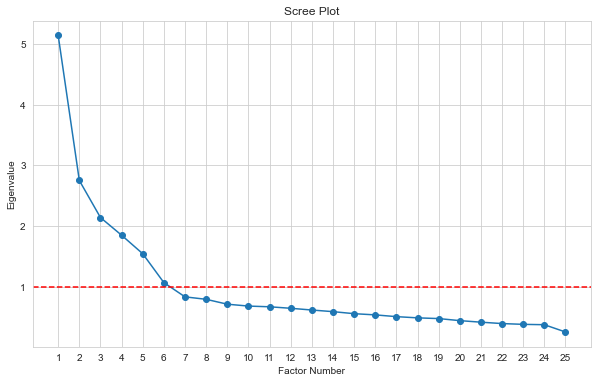

In [14]:
fa = FactorAnalyzer(rotation=None)
fa.fit(data)

# Get Eigenvalues
ev, v = fa.get_eigenvalues()

# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.xticks(range(1, len(ev) + 1))
plt.grid(True)
plt.show()

#### Memo

고윳값이 1 이상인 요인 6까지 선택 

## 요인 분석 수행

##### 요인 회전 
각 변수가 하나의 요인에 대해 적재량이 높도록, 다른 요인에 대해서는 낮도록 처리. -> 단순 구조를 만들어 해석 용이성의 증대
[종류]
1. 직각 회전(orthogonal rotation) : 요인들 간 상관관계를 0에 가깝게 함(요인들 간 상호 독립적)
- varimax : 각 요인 내 요인 적재값의 분산이 최대가 되도록
- quartimax : 각 변수의 요인 적재값 분산을 최소화
- equamax : varimax와 quartmax의 절충. 요인 내 & 변수 내 요인 적재값의 분산을 동시에 고려

2. 사각 회전(oblique rotation) : 요인들 간 상관관계를 허용
- direct oblimin : 요인적재값의 제곱합을 최소로.
- promax : 컴퓨팅 속도가 빨라, 대규모 데이터 처리에 적합.

In [15]:
help(FactorAnalyzer)

Help on class FactorAnalyzer in module factor_analyzer.factor_analyzer:

class FactorAnalyzer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  FactorAnalyzer(n_factors=3, rotation='promax', method='minres', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='median', svd_method='randomized', rotation_kwargs=None)
 |  
 |  The main exploratory factor analysis class.
 |  
 |  This class:
 |      (1) Fits a factor analysis model using minres, maximum likelihood,
 |          or principal factor extraction and returns the loading matrix
 |      (2) Optionally performs a rotation, with method including:
 |  
 |          (a) varimax (orthogonal rotation)
 |          (b) promax (oblique rotation)
 |          (c) oblimin (oblique rotation)
 |          (d) oblimax (orthogonal rotation)
 |          (e) quartimin (oblique rotation)
 |          (f) quartimax (orthogonal rotation)
 |          (g) equamax (orthogonal rotation)
 |  
 |  Parameters
 |  ----------
 |  n_factors 

In [16]:
# method 파라미터 : 디폴트는 'minres'(공통요인분석에 해당), 'principal'은 PCA
fa = FactorAnalyzer(6, rotation='varimax')
fa.fit(data)

fa_array = fa.loadings_
fa_df = pd.DataFrame(fa_array, columns=[f'factor{ii}' for ii in range(1, 7)], index=data.columns)
fa_df

,factor1,factor2,factor3,factor4,factor5,factor6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


##### Memo
일반적으로 요인 적재값이 +/- 0.3 이상이면 변수와 요인 간 유의성이 있다고 해석

In [17]:
fa_df_tmp = fa_df.copy()
for col in fa_df_tmp.columns :
    fa_df_tmp[col] = fa_df_tmp[col].apply(lambda x : None if np.abs(x) <= 0.3 else x)
fa_df_tmp

,factor1,factor2,factor3,factor4,factor5,factor6
A1,NaN,NaN,NaN,-0.530987,NaN,NaN
A2,NaN,NaN,NaN,0.661141,NaN,NaN
A3,NaN,0.343008,NaN,0.605933,NaN,NaN
A4,NaN,NaN,NaN,0.404594,NaN,NaN
A5,NaN,0.414458,NaN,0.469698,NaN,NaN
C1,NaN,NaN,0.554582,NaN,NaN,NaN
C2,NaN,NaN,0.674545,NaN,NaN,NaN
C3,NaN,NaN,0.551164,NaN,NaN,NaN
C4,NaN,NaN,-0.638475,NaN,NaN,0.318359
C5,NaN,NaN,-0.544838,NaN,NaN,NaN


__Interpretation__

1. Factor 1 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)
2. Factor 2 has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)
3. Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)
4. Factor 4 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
5. Factor 5 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
6. Factor 6 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only five factors.

In [18]:
fa = FactorAnalyzer(5, rotation='varimax')
fa.fit(data)

fa_array = fa.loadings_
fa_df = pd.DataFrame(fa_array, columns=[f'factor{ii}' for ii in range(1, 6)], index=data.columns)
fa_df

,factor1,factor2,factor3,factor4,factor5
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


In [19]:
fa_df_tmp = fa_df.copy()
for col in fa_df_tmp.columns :
    fa_df_tmp[col] = fa_df_tmp[col].apply(lambda x : None if np.abs(x) <= 0.3 else x)
fa_df_tmp

,factor1,factor2,factor3,factor4,factor5
A1,NaN,NaN,NaN,-0.428166,NaN
A2,NaN,NaN,NaN,0.626946,NaN
A3,NaN,0.317848,NaN,0.650743,NaN
A4,NaN,NaN,NaN,0.435624,NaN
A5,NaN,0.393034,NaN,0.537087,NaN
C1,NaN,NaN,0.545824,NaN,NaN
C2,NaN,NaN,0.648731,NaN,NaN
C3,NaN,NaN,0.557036,NaN,NaN
C4,NaN,NaN,-0.633806,NaN,NaN
C5,NaN,NaN,-0.562467,NaN,NaN


* Factor 1(Neuroticism) - N1,N2,N3,N4,N5 
* Factor 2(Extraversion) - E1,E2,E3,E4,E5 
* Factor 3(Conscientiousness) - C1,C2,C3,C4,C5 
* Factor 4(Agreeableness) - A1,A2,A3,A4,A5 
* Factor 5(Opennness) - O1,O2,O3,O4,O5 

In [20]:
fv_array = fa.get_factor_variance()
fv_df = pd.DataFrame(fv_array, columns=[f'factor{ii}' for ii in range(1, 6)], index=['SS Loadings', 'Proportion VAR', 'Cumulative Var'])
fv_df

,factor1,factor2,factor3,factor4,factor5
SS Loadings,2.709633,2.473090,2.041106,1.844498,1.522153
Proportion VAR,0.108385,0.098924,0.081644,0.073780,0.060886
Cumulative Var,0.108385,0.207309,0.288953,0.362733,0.423619
